## Importing Library

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Creating Active and Passive Voice DataFrame

In [58]:
#This is a 3D array of Active and Passive Voice Positive Forms
tenses = np.array([("Present","I eat","I am eating", "I have eaten", "I have been eating"), 
                   ("Past","I ate","I was eating", "I had eaten", "I had been eating"),
                   ("Future","I will eat","I will be eating", "I will have eaten", "I will have been eating"),
                   ("PastFuture","I would eat","I would be eating", "I would have eaten", "I would have been eating")],
                   dtype = [("Time", "U25"), ("Simple", "U50"), ("Continuous", "U50"), ("Perfect", "U50"), ("PerfCont", "U50")])
tenses_df = pd.DataFrame(tenses)

print(tenses_df)

# Passive Voice is coming soon

         Time       Simple         Continuous             Perfect  \
0     Present        I eat        I am eating        I have eaten   
1        Past        I ate       I was eating         I had eaten   
2      Future   I will eat   I will be eating   I will have eaten   
3  PastFuture  I would eat  I would be eating  I would have eaten   

                   PerfCont  
0        I have been eating  
1         I had been eating  
2   I will have been eating  
3  I would have been eating  


## Vacation Planning Analysis
### DataFrame Creation

In [59]:
# Creating the DataFrame
trip = np.array([("Paris", 200, 20, 200),("London", 250, 30, 120),
                 ("Dubai", 370, 15, 80),("Mumbai", 450, 10, 70),],
                 dtype = [("Cities", "U16"),("Return Flight", "<i4"),("Hotel Per Day", "<i4"),("Weekly Car Rent", "<i4")])
trip_df = pd.DataFrame(trip)

print(trip_df)
print(trip_df.loc[0])
print(trip_df.at[1, "Return Flight"])

# Or you can do like this
trip_alt = np.array([("Paris", 200, 20, 200),("London", 250, 30, 120),
                 ("Dubai", 370, 15, 80),("Mumbai", 450, 10, 70)])
trip_df_alt = pd.DataFrame(trip_alt, index=(1,2,3,4), columns=("Cities", "Return Flight", "Hotel Per Day", "Weekly Car Rent"))

print(trip_df)
print(trip_df.loc[0])
print(trip_df.at[1, "Return Flight"], "\n")

print(trip_df_alt)

   Cities  Return Flight  Hotel Per Day  Weekly Car Rent
0   Paris            200             20              200
1  London            250             30              120
2   Dubai            370             15               80
3  Mumbai            450             10               70
Cities             Paris
Return Flight        200
Hotel Per Day         20
Weekly Car Rent      200
Name: 0, dtype: object
250
   Cities  Return Flight  Hotel Per Day  Weekly Car Rent
0   Paris            200             20              200
1  London            250             30              120
2   Dubai            370             15               80
3  Mumbai            450             10               70
Cities             Paris
Return Flight        200
Hotel Per Day         20
Weekly Car Rent      200
Name: 0, dtype: object
250 

   Cities Return Flight Hotel Per Day Weekly Car Rent
1   Paris           200            20             200
2  London           250            30             120
3   Dubai   

### Function Creation
Cheapest City Function

In [60]:
# Cheapest City to visit for n days
def cost_of_trip(duration, flight, hotel, car):
    costs = flight+(duration*hotel)+(math.ceil(duration/7)*car)
    return costs

for city in trip_df.loc[:]:
    print(city)

Cities
Return Flight
Hotel Per Day
Weekly Car Rent


Vacation Worth Function

In [61]:
# The most beneficial vacation
def worth_of_trip(budget, flight, hotel, car):
    worth = (budget - flight) / (hotel + (car/7))
    worth = math.ceil(worth)
    return worth

### What is the cheapest city to visit in n days?
Searching for the costs of each city

The total trip cost to Paris in 14 days is $880
The total trip cost to London in 14 days is $910
The total trip cost to Dubai in 14 days is $740
The total trip cost to Mumbai in 14 days is $730 

The total trip cost to Paris in 14 days is $880
The total trip cost to London in 14 days is $910
The total trip cost to Dubai in 14 days is $740
The total trip cost to Mumbai in 14 days is $730


Text(0.5, 1.0, 'Cheapest city to visit in 14 days')

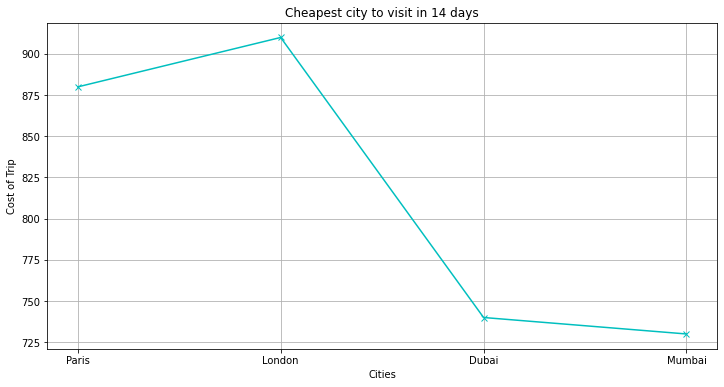

In [73]:
# Trip Variabels
duration = 14    # in days

# Execute the function
tripParis = cost_of_trip(duration, trip_df.at[0, "Return Flight"], trip_df.at[0, "Hotel Per Day"], trip_df.at[0, "Weekly Car Rent"])
tripLondon = cost_of_trip(duration, trip_df.at[1, "Return Flight"], trip_df.at[1, "Hotel Per Day"], trip_df.at[1, "Weekly Car Rent"])
tripDubai = cost_of_trip(duration, trip_df.at[2, "Return Flight"], trip_df.at[2, "Hotel Per Day"], trip_df.at[2, "Weekly Car Rent"])
tripMumbai = cost_of_trip(duration, trip_df.at[3, "Return Flight"], trip_df.at[3, "Hotel Per Day"], trip_df.at[3, "Weekly Car Rent"])

# Print the function
print("The total trip cost to Paris in {} days is ${}".format(duration, tripParis))
print("The total trip cost to London in {} days is ${}".format(duration, tripLondon))
print("The total trip cost to Dubai in {} days is ${}".format(duration, tripDubai))
print("The total trip cost to Mumbai in {} days is ${}".format(duration, tripMumbai), "\n")

# Or you can run it like this
costsPlot = []
for x in range((len(trip_df))):
    tripCosts = cost_of_trip(duration, trip_df.at[x, "Return Flight"], trip_df.at[x, "Hotel Per Day"], trip_df.at[x, "Weekly Car Rent"])
    print("The total trip cost to {} in {} days is ${}".format(trip_df.at[x, "Cities"], duration, tripCosts))
    costsPlot.append(tripCosts)

# Plot the data
plt.figure(figsize=(12,6))
plt.plot(trip_df["Cities"], costsPlot, 'x-c')
plt.xlabel("Cities")
plt.ylabel("Cost of Trip")
plt.grid(True)
plt.title("Cheapest city to visit in {} days".format(duration))

Comparing which trip is the cheapest one

In [63]:
# Compare which trip is the cheapest one
if tripParis < tripLondon and tripParis < tripDubai and tripParis < tripMumbai:
    print("The trip to Paris is the cheapest one in {} days".format(duration))
elif tripLondon < tripParis and tripLondon < tripDubai and tripLondon < tripMumbai:
    print("The trip to London is the cheapest one in {} days".format(duration))
elif tripDubai < tripLondon and tripDubai < tripParis and tripDubai < tripMumbai:
    print("The trip to Dubai is the cheapest one in {} days".format(duration))
elif tripMumbai < tripLondon and tripMumbai < tripDubai and tripMumbai < tripParis:
    print("The trip to Mumbai is the cheapest one in {} days".format(duration))

The trip to Mumbai is the cheapest one in 14 days


### If you have budget n dollars, how long can you spent in days for each city?
Searching for vacation worth

If you have $1000 of budget, you can stay 17 days in Paris
If you have $1000 of budget, you can stay 16 days in London
If you have $1000 of budget, you can stay 24 days in Dubai
If you have $1000 of budget, you can stay 28 days in Mumbai 

If you have budget of $1000, you can stay 17 days in Paris
If you have budget of $1000, you can stay 16 days in London
If you have budget of $1000, you can stay 24 days in Dubai
If you have budget of $1000, you can stay 28 days in Mumbai


Text(0.5, 1.0, 'Number of Days To Spent If You Have $1000')

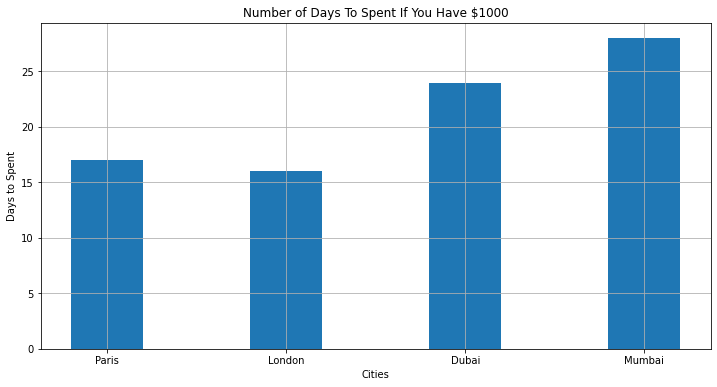

In [71]:
# Trip Variabels
budget = 1000    # in dollar

parisWorth = worth_of_trip(budget, trip_df.at[0, "Return Flight"], trip_df.at[0, "Hotel Per Day"], trip_df.at[0, "Weekly Car Rent"])
londonWorth = worth_of_trip(budget, trip_df.at[1, "Return Flight"], trip_df.at[1, "Hotel Per Day"], trip_df.at[1, "Weekly Car Rent"])
dubaiWorth = worth_of_trip(budget, trip_df.at[2, "Return Flight"], trip_df.at[2, "Hotel Per Day"], trip_df.at[2, "Weekly Car Rent"])
mumbaiWorth = worth_of_trip(budget, trip_df.at[3, "Return Flight"], trip_df.at[3, "Hotel Per Day"], trip_df.at[3, "Weekly Car Rent"])

# Print the function
print("If you have ${} of budget, you can stay {} days in {}".format(budget, parisWorth, trip_df.at[0, "Cities"]))
print("If you have ${} of budget, you can stay {} days in {}".format(budget, londonWorth, trip_df.at[1, "Cities"]))
print("If you have ${} of budget, you can stay {} days in {}".format(budget, dubaiWorth, trip_df.at[2, "Cities"]))
print("If you have ${} of budget, you can stay {} days in {}".format(budget, mumbaiWorth, trip_df.at[3, "Cities"]), "\n")

# Or you can run it like this
worthPlot = []
for x in range((len(trip_df))):
    tripWorth = worth_of_trip(budget, trip_df.at[x, "Return Flight"], trip_df.at[x, "Hotel Per Day"], trip_df.at[x, "Weekly Car Rent"])
    print("If you have budget of ${}, you can stay {} days in {}".format(budget, tripWorth, trip_df.at[x, "Cities"]))
    worthPlot.append(tripWorth)

# Plot the Data
plt.figure(figsize=(12,6))
plt.bar(trip_df["Cities"], worthPlot, width=0.4)    # or it can be .barh() for horizontal bar
plt.xlabel("Cities")
plt.ylabel("Days to Spent")
plt.grid(True)
plt.title("Number of Days To Spent If You Have ${}".format(budget))